# Attrition Prediction 
##### Kaggle dataset
### 

## Load Dataset

##### Import:

In [1]:
import pandas as pd
import numpy as np

##### Read data:

In [2]:
#Read data:
data = pd.read_csv(r"C:\Users\alina\OneDrive\Documents\Units\Portfolio\Attrition Prediction ML\employee_attrition.csv")
data.head()
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,...,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,...,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,...,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3


## Check columns data type

In [3]:
#Dataset info:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

## Replace cathegorical values with numerical 

##### Replace categorical values to dummy in the "BusinessTravel" and "MaritalStatus" columns:

In [4]:
#Unique values for "BusinessTravel" columns:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', nan],
      dtype=object)

In [5]:
#Unique values for "MaritalStatus" columns:
data['MaritalStatus'].unique()

array(['Divorced', 'Single', 'Married', nan], dtype=object)

In [6]:
data["BusinessTravel"].replace({"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2}, inplace=True)
data["MaritalStatus"].replace({"Single": 0, "Married": 1, "Divorced": 2}, inplace=True)

##### Replace cathergorical values with numerical in Attrition column:

In [7]:
data['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
data["Attrition"].replace({"Yes": 1, "No": 0}, inplace=True)

##### Replace nan values in "Age" column

In [9]:
#Select rows by Attrition:
yes = (data['Attrition'] == 1)
no = (data['Attrition'] == 0)

#Age mean grouped by Attrition:
avg_age_yes = data.loc[yes, 'Age'].mean()
avg_age_no = data.loc[no, 'Age'].mean()

#Replace nan in Age column with the mean grouped by Attrition:
data.loc[data['Age'].isnull() & yes, 'Age'] = avg_age_yes
data.loc[data['Age'].isnull() & no, 'Age'] = avg_age_no

##### Replace nan values in "BusinessTravel" column:

In [10]:
#BusinessTravel mean grouped by Attrition:
avg_BusinessTravel_yes = data.loc[yes, 'BusinessTravel'].mean()
avg_BusinessTravel_no = data.loc[no, 'BusinessTravel'].mean()
#Replace nan in BusinessTravel column with the mean grouped by Attrition:
data.loc[data['BusinessTravel'].isnull() & yes, 'BusinessTravel'] = avg_BusinessTravel_yes
data.loc[data['BusinessTravel'].isnull() & no, 'BusinessTravel'] = avg_BusinessTravel_no


##### Replace nan values in "DailyRate" column:

In [11]:
#DailyRate mean grouped by Attrition:
avg_DailyRate_yes = data.loc[yes, 'DailyRate'].mean()
avg_DailyRate_no = data.loc[no, 'DailyRate'].mean()

#Replace nan in DailyRate column with the mean grouped by Attrition:
data.loc[data['DailyRate'].isnull() & yes, 'DailyRate'] = avg_DailyRate_yes
data.loc[data['DailyRate'].isnull() & no, 'DailyRate'] = avg_DailyRate_no

##### Replace nan values in "DistanceFromHome" column:

In [12]:
#DistanceFromHome mean grouped by Attrition:
avg_DistanceFromHome_yes = data.loc[yes, 'DistanceFromHome'].mean()
avg_DistanceFromHome_no = data.loc[no, 'DistanceFromHome'].mean()

#Replace nan in DistanceFromHome column with the mean grouped by Attrition:
data.loc[data['DistanceFromHome'].isnull() & yes, 'DistanceFromHome'] = avg_DistanceFromHome_yes
data.loc[data['DistanceFromHome'].isnull() & no, 'DistanceFromHome'] = avg_DistanceFromHome_no

##### Replace nan value in "MaritalStatus" column:

In [13]:
#MaritalStatus mean grouped by Attrition:
avg_MaritalStatus_yes = data.loc[yes, 'MaritalStatus'].mean()
avg_MaritalStatus_no = data.loc[no, 'MaritalStatus'].mean()

#Replace nan in MaritalStatus column with the mean grouped by Attrition:
data.loc[data['MaritalStatus'].isnull() & yes, 'MaritalStatus'] = avg_MaritalStatus_yes
data.loc[data['MaritalStatus'].isnull() & no, 'MaritalStatus'] = avg_MaritalStatus_no


##### Check values again:

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1029 non-null   float64
 1   Attrition                 1029 non-null   int64  
 2   BusinessTravel            1029 non-null   float64
 3   DailyRate                 1029 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          1029 non-null   float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [15]:
#Import:
from sklearn.preprocessing import LabelEncoder
#Define encoder:
change = LabelEncoder()
#Change cathegorical values to numerical:
#data["Attrition"] = change.fit_transform(data["Department"])
data["Department"] = change.fit_transform(data["Department"])
data["EducationField"] = change.fit_transform(data["Department"])
data["Gender"] = change.fit_transform(data["Department"])
data["JobRole"] = change.fit_transform(data["Department"])
data["Over18"] = change.fit_transform(data["Department"])
data["OverTime"] = change.fit_transform(data["Department"])
data["Department"] = change.fit_transform(data["Department"])

In [16]:
data.shape

(1029, 35)

##### Seaborn plot

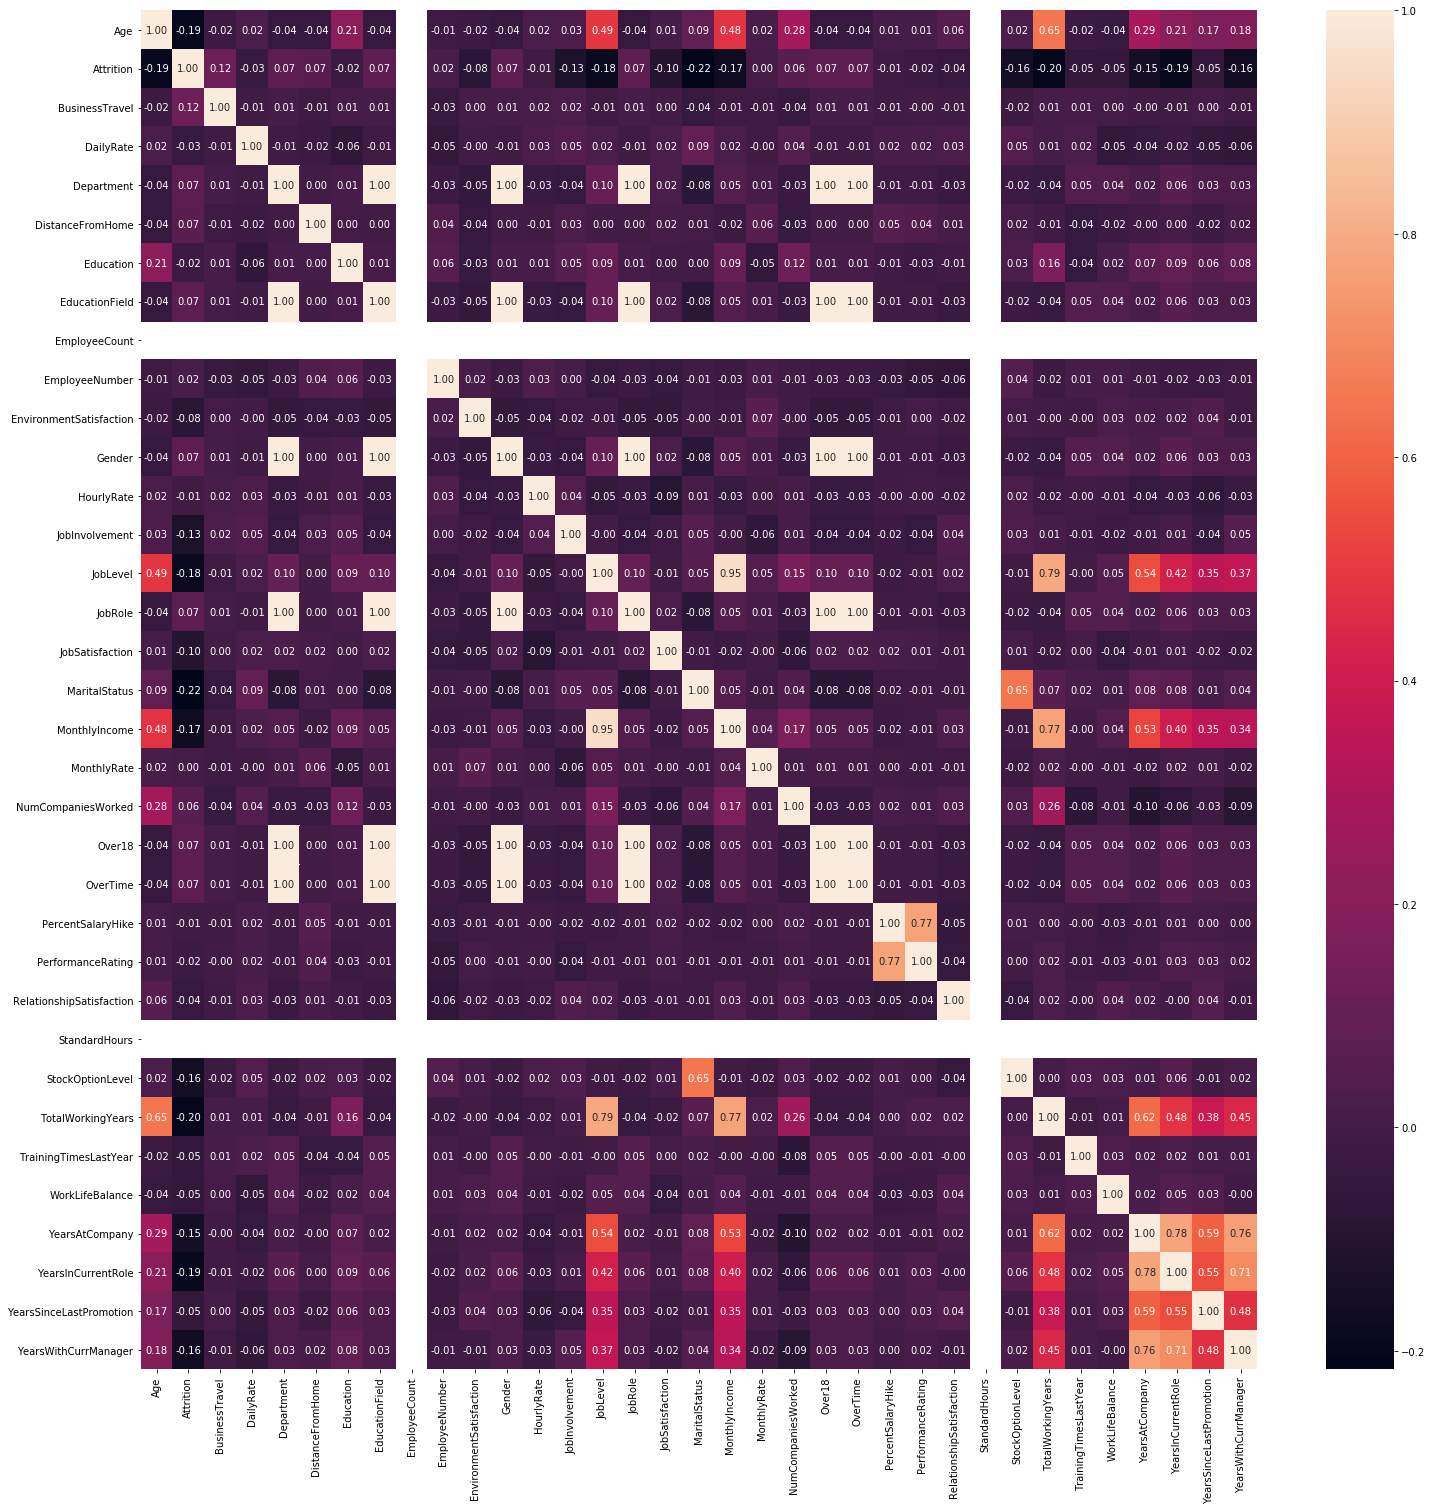

In [17]:
#Import:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

#Define function:
def plot_of_features(data):   
    # The init size
    rcParams['figure.figsize'] = 25, 25
    image = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    image.savefig('image_data.png')

#Plot correlation:
plot_of_features(data)

##### Select columns that has correlation with Attrition greater than or equal to 0.1

In [18]:
df = data[['Attrition', 'Age', 'BusinessTravel', 'JobInvolvement', 'JobLevel', 'MaritalStatus', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

##### Print new dataset:

In [19]:
df

,Attrition,Age,BusinessTravel,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,50.000000,1.0,3,4,2.0,17399,1,32,5,4,3
1,0,36.000000,1.0,3,2,2.0,4941,2,7,3,2,1
2,1,21.000000,1.0,3,1,0.0,2679,0,1,1,0,0
3,0,50.000000,2.0,3,5,1.0,18200,1,32,32,5,7
4,0,52.000000,1.0,3,3,0.0,10445,0,18,8,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,0,38.656417,1.0,4,2,1.0,3407,2,10,10,9,8
1025,0,41.000000,1.0,4,2,0.0,6870,0,11,3,2,2
1026,1,22.000000,2.0,2,1,1.0,2853,1,1,0,0,0
1027,0,29.000000,1.0,2,2,1.0,4025,1,10,4,3,3


##### Print out column names:

In [20]:
for col in df.columns:
    print(col)

Attrition
Age
BusinessTravel
JobInvolvement
JobLevel
MaritalStatus
MonthlyIncome
StockOptionLevel
TotalWorkingYears
YearsAtCompany
YearsInCurrentRole
YearsWithCurrManager


## Train/Test Split

##### Import:

In [21]:
import sklearn as sk
import sklearn.model_selection as model_selection

##### Define x, y:

In [22]:
#Define x and y
x = np.array(df.drop(['Attrition'],1))
y = np.array(df['Attrition'])

#Print out x and y type:
print("x is of type:{}".format(type(x)))
print("y is of type:{}".format(type(y)))

#Print out the unique values in y:
print("unique labels:{}".format(np.unique(y)))

x is of type:<class 'numpy.ndarray'>
y is of type:<class 'numpy.ndarray'>
unique labels:[0 1]


##### Train/Test split -> 70:30

In [23]:
#Train and test split 70:30
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size = 0.3, random_state = 42)

#Print out the shape:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

classes = ['No', 'Yes']

(720, 11)
(720,)
(309, 11)
(309,)


## Support vector machine (SVM)

##### Import:

In [24]:
from sklearn import svm
from sklearn import metrics

##### SVM model 1

In [25]:
#Create the SVM model:
svm_model = svm.SVC(kernel="linear")
#Fit the model:
svm_model.fit(x_train, y_train)
#Predict the response for test dataset:
y_pred = svm_model.predict(x_test)
y_pred

#Training/Testing Accuracy:
svm_acc=metrics.accuracy_score(y_train, svm_model.predict(x_train))
print("SVM Training Accuracy:{}".format(svm_acc*100), '%')
print(type(svm_model.support_vectors_))
print(svm_model.support_vectors_.shape)

#Testing Accuracy:
svm_acc_test=metrics.accuracy_score(y_test, svm_model.predict(x_test))
print("SVM Testing Accuracy:{}".format(svm_acc_test*100), '%')

SVM Training Accuracy:83.88888888888889 %
<class 'numpy.ndarray'>
(206, 11)
SVM Testing Accuracy:84.14239482200647 %


##### SVM model 2

In [26]:
#Create the SVM model:
svm_model = svm.SVC(kernel="linear", C=5)
#Fit the model:
svm_model.fit(x_train, y_train)
#Predict the response for test dataset:
y_pred = svm_model.predict(x_test)

#Training/Testing Accuracy:
svm_acc=metrics.accuracy_score(y_train, svm_model.predict(x_train))
print("SVM Training Accuracy:{}".format(svm_acc*100), '%')
print(type(svm_model.support_vectors_))
print(svm_model.support_vectors_.shape)

#Testing Accuracy:
svm_acc_test=metrics.accuracy_score(y_test, svm_model.predict(x_test))
print("SVM Testing Accuracy:{}".format(svm_acc_test*100), '%')

SVM Training Accuracy:84.30555555555556 %
<class 'numpy.ndarray'>
(203, 11)
SVM Testing Accuracy:85.43689320388349 %


## The k-nearest neighbors (KNN)

##### Import KNN:

In [27]:
from sklearn.neighbors import KNeighborsClassifier

##### KNN model 1

In [28]:
knn_model=KNeighborsClassifier(n_neighbors=3, weights='distance')      #The accuracy is 0.747
#Fit the model using our training data
knn_model.fit(x_train, y_train)

# Training Accuracy:
knn_acc=metrics.accuracy_score(y_train, knn_model.predict(x_train))
print("KNN Training Accuracy:{}".format(knn_acc))

#Testing Accuracy:
knn_acc_test=metrics.accuracy_score(y_test, knn_model.predict(x_test))
print("KNN Testing Accuracy:{}".format(knn_acc_test))

KNN Training Accuracy:1.0
KNN Testing Accuracy:0.7766990291262136


##### KNN model 2

In [29]:
knn_model=KNeighborsClassifier(n_neighbors=3, weights='distance')      #The accuracy is 0.748
#Fit the model using our training data
knn_model.fit(x_train, y_train)

# Training Accuracy:
knn_acc=metrics.accuracy_score(y_train, knn_model.predict(x_train))
print("KNN Training Accuracy:{}".format(knn_acc))

#Testing Accuracy:
knn_acc_test=metrics.accuracy_score(y_test, knn_model.predict(x_test))
print("KNN Testing Accuracy:{}".format(knn_acc_test))

KNN Training Accuracy:1.0
KNN Testing Accuracy:0.7766990291262136


##### KNN model 3

In [30]:
knn_model=KNeighborsClassifier(n_neighbors=21, weights='distance')      #The accuracy is 0.832
#Fit the model using our training data
knn_model.fit(x_train, y_train)

# Training Accuracy:
knn_acc=metrics.accuracy_score(y_train, knn_model.predict(x_train))
print("KNN Training Accuracy:{}".format(knn_acc))

#Testing Accuracy:
knn_acc_test=metrics.accuracy_score(y_test, knn_model.predict(x_test))
print("KNN Testing Accuracy:{}".format(knn_acc_test))

KNN Training Accuracy:1.0
KNN Testing Accuracy:0.8414239482200647


## Decision Tree

##### Import Decision Tree:

In [31]:
from sklearn.tree import DecisionTreeClassifier

##### Decision Tree model 1:

In [32]:
#Create model:
tree_model_1 = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=137)
#Fit the model
tree_model_1.fit(x_train, y_train)
#Predict:
y_pred_tree_1 = tree_model_1.predict(x_test)

##### Decision Tree model 2:

In [33]:
#Create model:
tree_model_2 = DecisionTreeClassifier(max_depth=2, ccp_alpha = 5) 
#Fit the model
tree_model_2.fit(x_train, y_train)
#Predict:
y_pred_tree_2 = tree_model_2.predict(x_test)

##### Decision Tree model 3:

In [34]:
#Create model:
tree_model_3 = DecisionTreeClassifier(max_depth=5, random_state=137) 
#Fit the model
tree_model_3.fit(x_train, y_train)
#Predict:
y_pred_tree_3 = tree_model_3.predict(x_test)

##### Decision Tree model 4:

In [35]:
#Create model:
tree_model_4 = DecisionTreeClassifier(max_depth=6, random_state=141)
#Fit the model
tree_model_4.fit(x_train, y_train)
#Predict:
y_pred_tree_4 = tree_model_4.predict(x_test)

##### Decision Tree accuracy:

In [36]:
#Model 1:

print('Decision Tree Model 1')
# Training Accuracy:
tree_acc=metrics.accuracy_score(y_train, tree_model_1.predict(x_train))
print("The Decision Tree Training Accuracy:{}".format(tree_acc))
#Testing Accuracy:
tree_acc_test=metrics.accuracy_score(y_test, tree_model_1.predict(x_test))
print("The Decision Tree Testing Accuracy:{}".format(tree_acc_test))
print('')

#Model 2:

print('Decision Tree Model 2')
# Training Accuracy:
tree_acc=metrics.accuracy_score(y_train, tree_model_2.predict(x_train))
print("The Decision Tree Training Accuracy:{}".format(tree_acc))
#Testing Accuracy:
tree_acc_test=metrics.accuracy_score(y_test, tree_model_2.predict(x_test))
print("The Decision Tree Testing Accuracy:{}".format(tree_acc_test))
print('')

#Model 3:

print('Decision Tree Model 3')
# Training Accuracy:
tree_acc=metrics.accuracy_score(y_train, tree_model_3.predict(x_train))
print("The Decision Tree Training Accuracy:{}".format(tree_acc))
#Testing Accuracy:
tree_acc_test=metrics.accuracy_score(y_test, tree_model_3.predict(x_test))
print("The Decision Tree Testing Accuracy:{}".format(tree_acc_test))
print('')

#Model 4:

print('Decision Tree Model 4')
# Training Accuracy:
tree_acc=metrics.accuracy_score(y_train, tree_model_4.predict(x_train))
print("The Decision Tree Training Accuracy:{}".format(tree_acc))
#Testing Accuracy:
tree_acc_test=metrics.accuracy_score(y_test, tree_model_4.predict(x_test))
print("The Decision Tree Testing Accuracy:{}".format(tree_acc_test))

Decision Tree Model 1
The Decision Tree Training Accuracy:0.8555555555555555
The Decision Tree Testing Accuracy:0.8673139158576052

Decision Tree Model 2
The Decision Tree Training Accuracy:0.8263888888888888
The Decision Tree Testing Accuracy:0.8349514563106796

Decision Tree Model 3
The Decision Tree Training Accuracy:0.8972222222222223
The Decision Tree Testing Accuracy:0.8511326860841424

Decision Tree Model 4
The Decision Tree Training Accuracy:0.9055555555555556
The Decision Tree Testing Accuracy:0.8543689320388349


## Random Forest

##### Import Random Forest:

In [37]:
from sklearn.ensemble import RandomForestClassifier

##### Random Forest Model 1:

In [38]:
#Create model 1:
forest_model_1 = RandomForestClassifier(n_estimators = 2, random_state = 42, criterion = 'gini', max_depth = 5) 
#Fit the Model:
forest_model_1.fit(x_train, y_train)
#Predict:
y_pred_forest_1 = forest_model_1.predict(x_test)

In [39]:
#Create model 1:
forest_model_2 = RandomForestClassifier(n_estimators =2, random_state=137)   
#Fit the Model:
forest_model_2.fit(x_train, y_train)
#Predict:
y_pred_forest_2 = forest_model_2.predict(x_test)

In [40]:
#Create model 1:
forest_model_3 = RandomForestClassifier(n_estimators =3, random_state=137)
#Fit the Model:
forest_model_3.fit(x_train, y_train)
#Predict:
y_pred_forest_3 = forest_model_3.predict(x_test)

In [41]:
#Create model 1:
forest_model_4 = RandomForestClassifier(n_estimators =25, random_state=137)
#Fit the Model:
forest_model_4.fit(x_train, y_train)
#Predict:
y_pred_forest_4 = forest_model_4.predict(x_test)

##### Random Forest accuracy:

In [42]:
#Model 1:
print('Random Forest Model 1')
# Training Accuracy:
forest_acc=metrics.accuracy_score(y_train, forest_model_1.predict(x_train))
print("The Random Forest Training Accuracy:{}".format(forest_acc))
#Testing Accuracy:
forest_acc_test=metrics.accuracy_score(y_test, forest_model_1.predict(x_test))
print("The Random Forest Testing Accuracy:{}".format(forest_acc_test))
print('')

#Model 2:

print('Random Forest Model 2')
# Training Accuracy:
forest_acc=metrics.accuracy_score(y_train, forest_model_2.predict(x_train))
print("The Random Forest Training Accuracy:{}".format(forest_acc))
#Testing Accuracy:
forest_acc_test=metrics.accuracy_score(y_test, forest_model_2.predict(x_test))
print("The Random Forest Testing Accuracy:{}".format(forest_acc_test))
print('')

#Model 3:

print('Random Forest Model 3')
# Training Accuracy:
forest_acc=metrics.accuracy_score(y_train, forest_model_3.predict(x_train))
print("The Random Forest Training Accuracy:{}".format(forest_acc))
#Testing Accuracy:
forest_acc_test=metrics.accuracy_score(y_test, forest_model_3.predict(x_test))
print("The Random Forest Testing Accuracy:{}".format(forest_acc_test))
print('')

#Model 4:

print('Random Forest Model 4')
# Training Accuracy:
forest_acc=metrics.accuracy_score(y_train, forest_model_4.predict(x_train))
print("The Random Forest Training Accuracy:{}".format(forest_acc))
#Testing Accuracy:
forest_acc_test=metrics.accuracy_score(y_test, forest_model_4.predict(x_test))
print("The Random Forest Testing Accuracy:{}".format(forest_acc_test))

Random Forest Model 1
The Random Forest Training Accuracy:0.8652777777777778
The Random Forest Testing Accuracy:0.8284789644012945

Random Forest Model 2
The Random Forest Training Accuracy:0.9305555555555556
The Random Forest Testing Accuracy:0.8155339805825242

Random Forest Model 3
The Random Forest Training Accuracy:0.9611111111111111
The Random Forest Testing Accuracy:0.7961165048543689

Random Forest Model 4
The Random Forest Training Accuracy:0.9986111111111111
The Random Forest Testing Accuracy:0.8284789644012945


## Comparison

The 100% train accuracy for KNN indicates model overfitting.The SVM has almost the same accuracy for train and test set. The Decision Tree models show overfitting as well.

The best models:

The decision Tree Classifier with max_depth=6 and random_state=141 shows the accuracy of 0.906 and 0.854 for train and test set respectively. The highest train accuracy for Random Forest is 82%.